In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import yaml

# Check years
import os

# Heat plot
# import holoviews as hv
# from holoviews import opts

# Day count map
import cartopy.feature as cfeature
import cartopy.crs as ccrs

from data_handler import DataHandler

from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
gpd.options.io_engine = "pyogrio"

# hv.extension('matplotlib')
# hv.output(fig='svg')

In [3]:
# TODO Modularize
with open('../../config/satvis.yaml', 'r') as f:
    config = yaml.safe_load(f)

dir_dict = config['data_directories']
cyano_data = dir_dict['cyano_data']
data_dir = dir_dict['data_dir']

print(cyano_data)
print(data_dir)

C:\Kodning\data\satvistest\cyano_data
C:\Kodning\data\satvistest


# Annual bloom area "heat plot"
Based on example in [HoloViews docs](https://holoviews.org/gallery/demos/matplotlib/measles_example.html)

In [397]:
cyano_daymap_files = DataHandler.generate_filepaths(cyano_data, not_pattern='2020')

In [398]:
# Find files with duplicate data
year_dict = {}
for file in cyano_daymap_files:
    gdf = gpd.read_file(file)
    gdf.insert(1, 'date', gdf['from_file'].str.extract(str(r'_(\d{8})\.')))
    gdf['date'] = pd.to_datetime(gdf['date'])
    year_dict[os.path.basename(file)] = (gdf['date'].dt.year.min(), gdf['date'].dt.year.max())
year_dict

{'cyano_daymap_2002.gpkg': (2002, 2002),
 'cyano_daymap_2003.gpkg': (2003, 2003),
 'cyano_daymap_2004.gpkg': (2004, 2004),
 'cyano_daymap_2005.gpkg': (2005, 2020),
 'cyano_daymap_2006.gpkg': (2006, 2020),
 'cyano_daymap_2007.gpkg': (2007, 2020),
 'cyano_daymap_2008.gpkg': (2008, 2020),
 'cyano_daymap_2009.gpkg': (2009, 2020),
 'cyano_daymap_2010.gpkg': (2010, 2010),
 'cyano_daymap_2011.gpkg': (2011, 2011),
 'cyano_daymap_2012.gpkg': (2012, 2012),
 'cyano_daymap_2013.gpkg': (2013, 2013),
 'cyano_daymap_2014.gpkg': (2014, 2014),
 'cyano_daymap_2015.gpkg': (2015, 2015),
 'cyano_daymap_2016.gpkg': (2016, 2016),
 'cyano_daymap_2017.gpkg': (2017, 2017),
 'cyano_daymap_2018.gpkg': (2018, 2018),
 'cyano_daymap_2019.gpkg': (2019, 2019),
 'cyano_daymap_2021.gpkg': (2021, 2021),
 'cyano_daymap_2022.gpkg': (2022, 2022),
 'cyano_daymap_2023.gpkg': (2023, 2023)}

In [5]:
# TODO Modularize into dataframe_list_from_generator()
cyano_daymap_list = []
cyano_file_list = []
for file in cyano_daymap_files:
    cyano_file_list.append(file)
    gdf = gpd.read_file(file)
    cyano_daymap_list.append(gdf)

In [6]:
# TODO Fix duplication of 2020 data
cyano_file_list

['C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2002.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2003.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2004.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2005.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2006.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2007.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2008.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2009.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2010.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2011.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2012.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2013.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_dayma

In [7]:
# TODO Restructure loop to make it less opaque (and include month_day column)
for i in range(len(cyano_daymap_list)):
    gdf = cyano_daymap_list[i]
    gdf = gdf.where(gdf['class'].isin([2, 3])).dropna()
    gdf.insert(1, 'date', gdf['from_file'].str.extract(str(r'_(\d{8})\.')))
    gdf['date'] = pd.to_datetime(gdf['date'])
    gdf = gdf[['date', 'geometry']]
    gdf = gdf.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(drop=True)
    gdf['area'] = gdf['geometry'].area
    cyano_daymap_list[i] = gdf

C:\Users\k000851\AppData\Local\Temp\ipykernel_9492\1855729747.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gdf = gdf.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(drop=True)
C:\Users\k000851\AppData\Local\Temp\ipykernel_9492\1855729747.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gdf = gdf.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(dro

In [8]:
all_cyano_daymaps = pd.concat(cyano_daymap_list)

In [9]:
all_cyano_daymaps['month_day'] = all_cyano_daymaps['date'].dt.strftime('%m-%d')

In [11]:
all_cyano_daymaps['month_day'].min()

'05-18'

In [12]:
all_cyano_daymaps['month_day'].max()

'09-25'

In [166]:
# TODO Add to calculation of plot extent (first of month.min() and month.max() +1
pd.to_datetime(f'2003-{all_cyano_daymaps['month_day'].min()}').dayofyear - pd.to_datetime(f'2003-{all_cyano_daymaps['month_day'].max()}').dayofyear

-130

In [13]:
min_md = all_cyano_daymaps['month_day'].min()
max_md = all_cyano_daymaps['month_day'].max()

min_year = all_cyano_daymaps['date'].dt.year.min()
max_year = all_cyano_daymaps['date'].dt.year.max()

years = range(min_year, max_year +1)

date_ranges = [pd.date_range(f'{year}-{min_md}', f'{year}-{max_md}') for year in years]
full_date_range = pd.concat([pd.DataFrame(index=date_range) for date_range in date_ranges])

In [14]:
# Check for duplicate values in the date column
all_cyano_daymaps[all_cyano_daymaps.duplicated('date', keep=False)]

,geometry,date,area,month_day


In [279]:
# TODO Refactor to use proper variable rather than test
all_cyano_test = all_cyano_daymaps[['date', 'month_day', 'area']]

In [285]:
# TODO Verify proper data scale
all_cyano_test['area'] = all_cyano_test['area'] / 1000000

In [280]:
all_cyano_test = all_cyano_test.set_index('date').reindex(full_date_range.index).fillna(0)

In [286]:
all_cyano_test = all_cyano_test.reset_index()

In [287]:
all_cyano_test = all_cyano_test.rename(columns={'index': 'date'})

In [ ]:
all_cyano_test['year'] = all_cyano_test['date'].dt.year
all_cyano_test['month_day'] = all_cyano_test['date'].dt.strftime('%m-%d')

In [289]:
# TODO Refactor to use proper variable name
all_cyano_test2 = all_cyano_test.pivot(columns='year', index='month_day', values='area').reset_index().fillna(0)

In [290]:
all_cyano_test2

year,month_day,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,05-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1583.0,1152.0,0.0,0.0,0.0,0.0,0.0
1,05-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1906.0,1285.0,0.0,0.0,0.0,0.0,0.0
2,05-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,301.0,117.0,0.0,0.0,0.0,0.0,0.0
3,05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6085.0,0.0,0.0,0.0,0.0,0.0,0.0
4,05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2059.0,1027.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,916.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
127,09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
annual_blooms = pd.melt(all_cyano_test2, id_vars=['month_day'], var_name='year', value_name='area')

In [293]:
# TODO Generalize
start_date = '2024-05-18'
end_date = '2024-09-25'

dates = pd.date_range(start=start_date, end=end_date, freq='W')
xlabels = [date.strftime('%m-%d') for date in dates]

In [ ]:
# TODO Generalize
week_increment = list(range(0, 131, 7))

xlabels = []
for i in week_increment:
    mon_day = all_cyano_test2['month_day'].iloc[i]
    xlabels.append(mon_day)

In [369]:
%matplotlib inline
import matplotlib.colors as mcolors

# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = plt.cm.Greys(np.linspace(0, 0, 1))
colors2 = plt.cm.Greys(np.linspace(.1, .5, 7))
colors3 = plt.cm.viridis(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2, colors3))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [370]:
# TODO generalize aspect
# Heatmap of A/T/I?
heatmap = hv.HeatMap(annual_blooms)
heatmap.opts(
    opts.HeatMap(title='Total bloom area per date per season', fig_size=800, cmap=mymap, aspect=130/22, invert_yaxis=True, show_values=False, show_frame=False, labelled=[], colorbar=True, cbar_width=0.01, clabel='Area \n [km\u00b2]\u00D710\u00b3', xticks=(list(range(0, 131, 7)), xlabels)))

:HeatMap   [month_day,year]   (area)

In [338]:
heatmap = hv.HeatMap(annual_blooms)
heatmap.opts(
    opts.HeatMap(title='Total bloom area per date per season (log10)', fig_size=800, cmap='Greens', logz=True, aspect=130/22, invert_yaxis=True, show_values=False, show_frame=False, labelled=[], colorbar=True, cbar_width=0.01, clabel='Area \n [km\u00b2]\u00D710\u00b3', xticks=(list(range(0, 131, 7)), xlabels)))

:HeatMap   [month_day,year]   (area)

In [152]:
# Documentation for HeatMap plot.
hv.help(hv.HeatMap)

HeatMap

Online example: http://holoviews.org/reference/elements/matplotlib/HeatMap.html

-------------
Style Options
-------------

	annular_edgecolors, annular_linewidth, xmarks_linewidth, xmarks_edgecolor, cmap, ymarks_linewidth, ymarks_edgecolor

(Consult matplotlib's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'RadialHeatMapPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                   Value                    Type         Bounds     Mode  

fontsize                                None                 Parameter                V RW AN 
fontscale                               None                   Number                 V RW AN 
show_title                              True                  Boolean                   V RW  
titl

# Annual ATI bar plot

In [8]:
ati_file = pd.read_csv(f'{data_dir}\\year_ati.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Kodning\\Satvis\\data\\satvistest\\\\year_ati.csv'

In [76]:
ati_file

,year,A,T,I
0,2003,3.367670e+11,10.188812,3.431255e+12
1,2004,8.648140e+10,5.763881,4.984685e+11


C:\Users\k000851\AppData\Local\Temp\ipykernel_17804\3714203726.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(['0', '1', '2', '3'])
C:\Users\k000851\AppData\Local\Temp\ipykernel_17804\3714203726.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_yticklabels(['0', '1', '2', '3'])


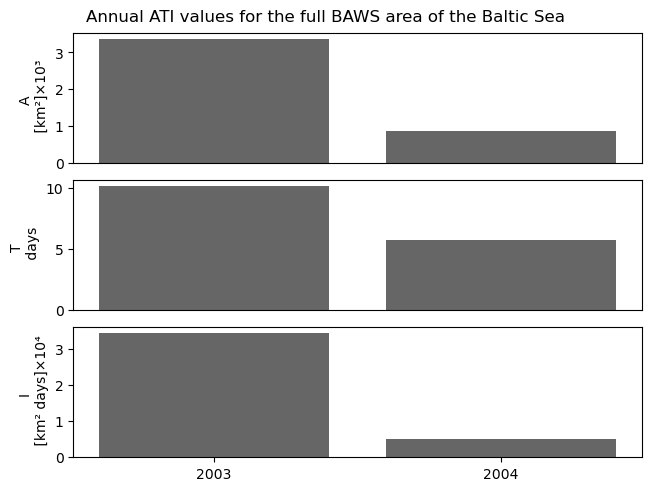

In [63]:
%matplotlib inline

fig = plt.figure(layout='constrained')
fig.suptitle('Annual ATI values for the full BAWS area of the Baltic Sea')

ax_dict = fig.subplot_mosaic(mosaic)

a = ax_dict['A']
a.bar(ati_file['year'], ati_file['A'], color='0.4')
a.set_ylabel('A \n [km\u00b2]\u00D710\u00b3')
a.tick_params(labelbottom=False, bottom=False)
# TODO Fix UserWarning
a.set_yticklabels(['0', '1', '2', '3'])

t = ax_dict['T']
t.bar(ati_file['year'], ati_file['T'], color='0.4')
t.set_ylabel('T \n days')
t.tick_params(labelbottom=False, bottom=False)

i = ax_dict['I']
i.bar(ati_file['year'], ati_file['I'], color='0.4')
i.set_ylabel('I \n [km\u00b2 days]\u00D710\u2074')
# TODO Fix UserWarning
i.set_yticklabels(['0', '1', '2', '3'])
i.set_xticks(np.arange(2003, 2005, 1))

# Annual day count of blooms over entire BAWS area
Plotted as a grid with a subplot for each year

In [9]:
bloom_count_files = DataHandler.generate_filepaths(data_dir, pattern='bloom_day_count')

In [10]:
# TODO dataframe_list_from_generator()
bloom_count_list = []
file_list = []
for file in bloom_count_files:
    file_list.append(file)
    gdf = gpd.read_file(file)
    bloom_count_list.append(gdf)

In [58]:
gdf = gpd.read_file("C:\\Kodning\\Satvis\\src\\satvistest\\2023_baraBottenhavet_bloom_day_count_geometries.gpkg")

In [8]:
bloom_count_list = []
bloom_count_list.append(gdf)

c:\Users\k000851\AppData\Local\miniforge3\envs\VisTest\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


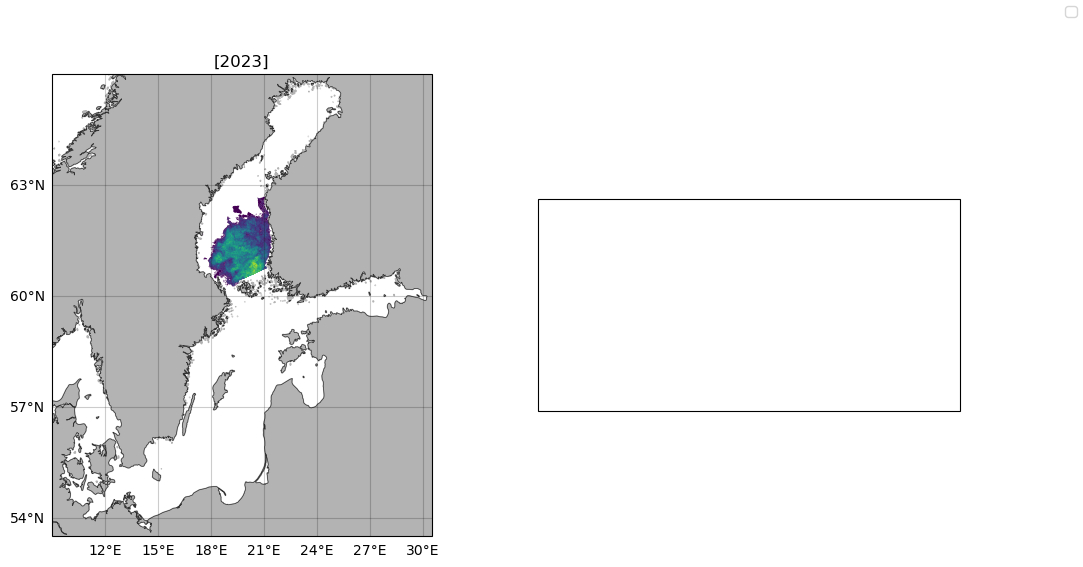

In [9]:
# TODO Refactor to subplot_mosaic
# TODO Fix UserWarning: facecolor will have no effect as it has been defined as "never".
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i, (ax, gdf) in enumerate(zip(axs.ravel(), bloom_count_list)):
    ax.set_title(gdf['date'].dt.year.unique())
    gdf.to_crs(epsg=4326).plot(ax=ax, column="n_overlaps", categorical=True, cmap="viridis")

    ax.set_extent([9, 30.5, 53.5, 66], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5, color='0.2')
    ax.add_feature(cfeature.LAND.with_scale('10m'), color='0.7')
    gl = ax.gridlines(draw_labels=True, alpha=0.2, color='black')
    
    if i == 0:
        gl.right_labels = False
        gl.top_labels = False
    else:
        gl.left_labels = False
        gl.right_labels = False
        gl.top_labels = False
    
    gl.xlocator = MultipleLocator(3)
    gl.ylocator = MultipleLocator(3)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# ax = plt.axes(projection=ccrs.PlateCarree())

In [ ]:
# TODO Refactor to subplot_mosaic
# TODO Fix UserWarning: facecolor will have no effect as it has been defined as "never".
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i, (ax, gdf) in enumerate(zip(axs.ravel(), bloom_count_list)):
    ax.set_title(gdf['date'].dt.year.unique())
    gdf.to_crs(epsg=4326).plot(ax=ax, column="n_overlaps", categorical=True, cmap="viridis")

    ax.set_extent([9, 30.5, 53.5, 66], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5, color='0.2')
    ax.add_feature(cfeature.LAND.with_scale('10m'), color='0.7')
    gl = ax.gridlines(draw_labels=True, alpha=0.2, color='black')
    
    if i == 0:
        gl.right_labels = False
        gl.top_labels = False
    else:
        gl.left_labels = False
        gl.right_labels = False
        gl.top_labels = False
    
    gl.xlocator = MultipleLocator(3)
    gl.ylocator = MultipleLocator(3)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# ax = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(column="n_overlaps", categorical=True, legend=True, cmap="viridis", figsize=(15, 15))

c:\Users\k000851\AppData\Local\miniforge3\envs\VisTest\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: title={'center': '2023 – Bottenhavet'}>

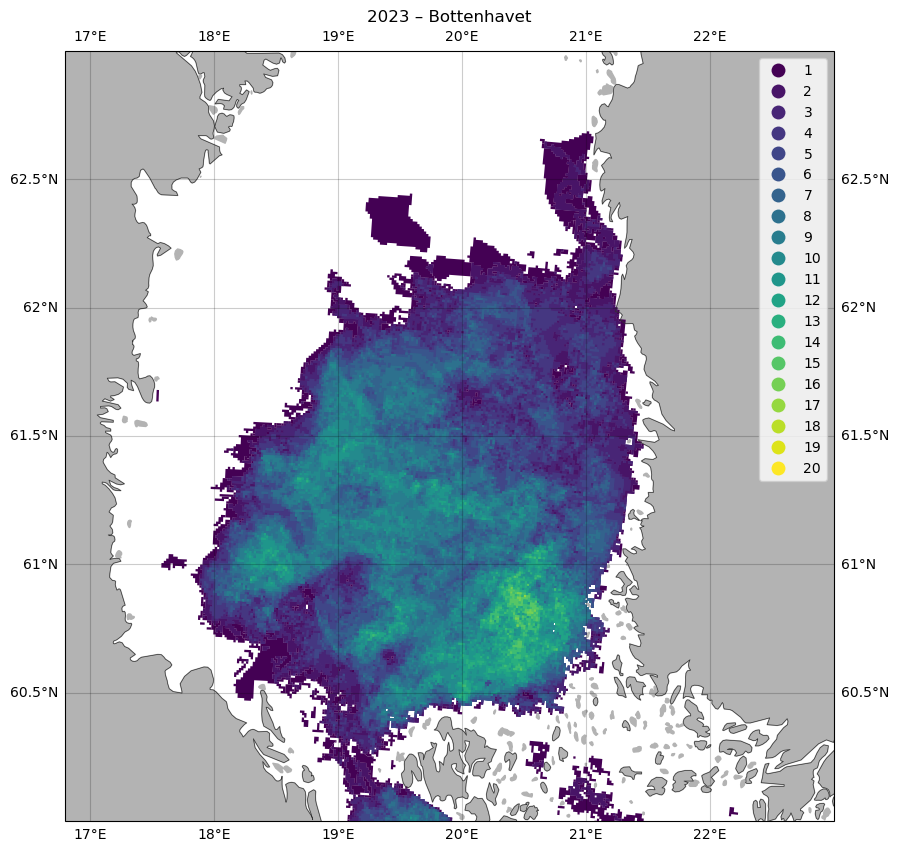

In [19]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title("2023 – Bottenhavet")

ax.set_extent([16.8, 23, 60, 63], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5, color='0.2')
ax.add_feature(cfeature.LAND.with_scale('10m'), color='0.7')
gl = ax.gridlines(draw_labels=True, alpha=0.2, color='black')
gdf.to_crs(epsg=4326).plot(ax=ax, column="n_overlaps", categorical=True, cmap="viridis", legend=True)

c:\Users\k000851\AppData\Local\miniforge3\envs\VisTest\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


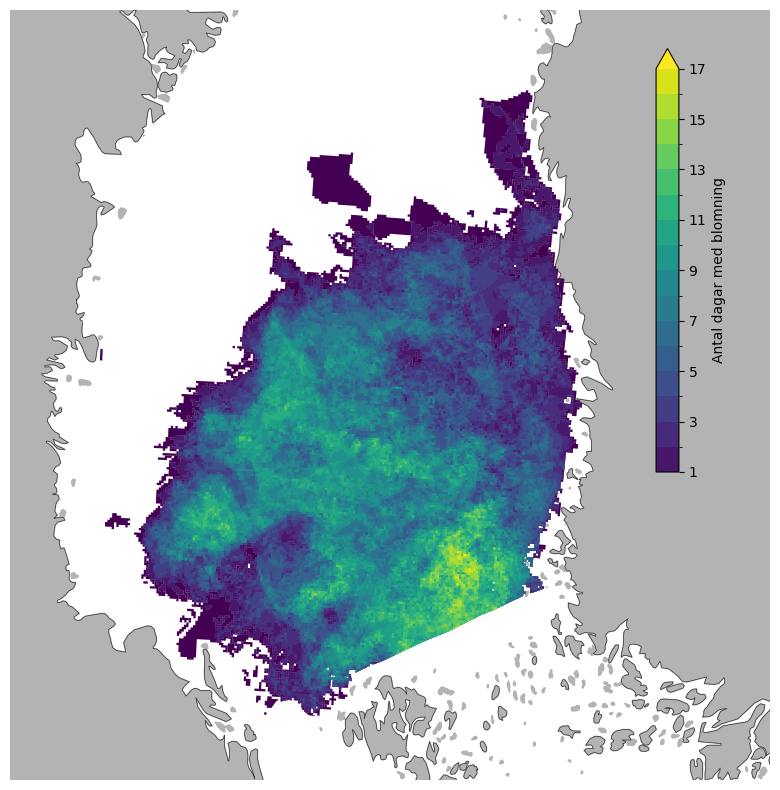

In [60]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# ax.set_title("2023 – Bottenhavet")

ax.set_extent([16.8, 23, 60, 63], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5, color='0.2')
ax.add_feature(cfeature.LAND.with_scale('10m'), color='0.7')

cmap = mpl.cm.viridis
bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
cax = ax.inset_axes([.85, 0.4, 0.03, 0.55])

plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical',
             cax=cax,
             label='Antal dagar med blomning',
             extend='max',
             shrink=0.5)
plt.axis("off")   # turns off axes

# gl = ax.gridlines(draw_labels=True, alpha=0.2, color='black')
final = gdf.to_crs(epsg=4326).plot(ax=ax, column="n_overlaps", categorical=True, cmap="viridis")
plt.savefig('aggregation_2023_baraBottenhavet_v1',bbox_inches='tight', pad_inches=0)